In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sent_df = pd.read_pickle("./data/processed_data.pkl")

In [17]:
class_cols = list(sent_df.iloc[:,4:16].columns)
mixed_cols = list(sent_df.iloc[:,17:].columns)

In [11]:
def class_results(row, col_name):
    if row[col_name] == "PARSE_FAIL":
        return "PARSE_FAIL"
    elif row["gold_label"]:
        if row[col_name]:
            return "True Positive"
        else:
            return "False Negative"
    else:
        if row[col_name]:
            return "False Positive"
        else:
            return "True Negative"

In [18]:
classical_df = pd.DataFrame(columns=class_cols)
for col in class_cols:
    classical_df[col] = sent_df.apply(lambda row: class_results(row, col), axis=1)
classical_df.head()

,classical@0.0001,classical@0.00025,classical@0.0005,classical@0.00075,classical@0.001,classical@0.0025,classical@0.005,classical@0.0075,classical@0.01,classical@0.025,classical@0.05,classical@0.075
0,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive
1,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative
2,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative
3,True Positive,True Positive,True Positive,True Positive,True Positive,False Negative,False Negative,False Negative,False Negative,False Negative,False Negative,False Negative
4,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive


In [19]:
mixed_df = pd.DataFrame(columns=mixed_cols)
for col in mixed_cols:
    mixed_df[col] = sent_df.apply(lambda row: class_results(row, col), axis=1)
mixed_df.head()

,mixed@0.0001,mixed@0.00025,mixed@0.0005,mixed@0.00075,mixed@0.001,mixed@0.0025,mixed@0.005,mixed@0.0075,mixed@0.01,mixed@0.025,mixed@0.05,mixed@0.075
0,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive
1,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative
2,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative,True Negative
3,True Positive,True Positive,True Positive,True Positive,True Positive,False Negative,False Negative,False Negative,False Negative,False Negative,False Negative,False Negative
4,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive,True Positive


In [20]:
def get_scores(dist):
    vals = dist.value_counts()
    tp = vals["True Positive"]
    fp = vals["False Positive"]
    tn = vals["True Negative"]
    fn = vals["False Negative"]
    pf = vals["PARSE_FAIL"]
    acc = (tp + tn) / (tp + tn + fp + fn + pf)
    acc_wo_pf = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = 2 * ((prec * rec) / (prec + rec))
    return acc, acc_wo_pf, prec, rec, f1


In [21]:
mixed_acc_df = mixed_df.apply(lambda col: get_scores(col), axis=0).transpose()
mixed_acc_df.columns = ["Accuracy", "Accuracy_wo_parsefails", "Precision", "Recall", "F1"]
mixed_acc_df


,Accuracy,Accuracy_wo_parsefails,Precision,Recall,F1
mixed@0.0001,0.848813,0.850569,0.819138,0.887108,0.851770
mixed@0.00025,0.857757,0.859531,0.843502,0.871439,0.857243
mixed@0.0005,0.864637,0.866425,0.865253,0.857550,0.861384
mixed@0.00075,0.864809,0.866598,0.873074,0.847578,0.860137
mixed@0.001,0.866357,0.868149,0.878474,0.844373,0.861086
mixed@0.0025,0.866529,0.868321,0.893986,0.825855,0.858571
mixed@0.005,0.863777,0.865564,0.908541,0.803063,0.852552
mixed@0.0075,0.861369,0.863151,0.913383,0.792379,0.848589
mixed@0.01,0.860337,0.862117,0.918682,0.784544,0.846331
mixed@0.025,0.852941,0.854705,0.930355,0.756410,0.834414


In [22]:
class_acc_df = classical_df.apply(lambda col: get_scores(col), axis=0).transpose()
class_acc_df.columns = ["Accuracy", "Accuracy_wo_parsefails", "Precision", "Recall", "F1"]
class_acc_df

,Accuracy,Accuracy_wo_parsefails,Precision,Recall,F1
classical@0.0001,0.817337,0.819028,0.767173,0.898860,0.827812
classical@0.00025,0.836773,0.838504,0.802457,0.883903,0.841213
classical@0.0005,0.844341,0.846088,0.823808,0.867521,0.845100
classical@0.00075,0.846749,0.848501,0.834084,0.857550,0.845654
classical@0.001,0.850361,0.852120,0.844037,0.851852,0.847926
classical@0.0025,0.854661,0.856429,0.865335,0.832977,0.848848
classical@0.005,0.856037,0.857808,0.885648,0.810897,0.846626
classical@0.0075,0.858445,0.860221,0.899560,0.800570,0.847183
classical@0.01,0.855177,0.856946,0.903673,0.788462,0.842145
classical@0.025,0.852425,0.854188,0.922481,0.762821,0.835088


In [23]:
def print_scores(dist):
    acc, acc_wo_pf, prec, rec, f1 = get_scores(dist)
    print("Accuracy: {:.4f}".format(acc))
    print("Accuracy (w/o parse failures): {:.4f}".format(acc_wo_pf))
    print("Percentage of parse failures: {:.4f}".format(pf / (tp + tn + fp + fn + pf)))
    print("Precision: {:.4f}".format(prec))
    print("Recall: {:.4f}".format(rec))
    print("F1 Score: {:.4f}".format(f1))

In [37]:
class_max = class_acc_df["F1"].idxmax()
mixed_max = mixed_acc_df["F1"].idxmax()
print(class_max, mixed_max)

classical_dist = classical_df.loc[:,class_max]
mixed_dist = mixed_df.loc[:,mixed_max]

classical@0.0025 mixed@0.0005


In [38]:
classical_dist.value_counts()

True Negative     2630
True Positive     2339
False Negative     469
False Positive     364
PARSE_FAIL          12
Name: classical@0.0025, dtype: int64

In [39]:
mixed_dist.value_counts()

True Negative     2619
True Positive     2408
False Negative     400
False Positive     375
PARSE_FAIL          12
Name: mixed@0.0005, dtype: int64

In [40]:
get_scores(classical_dist)

(0.8546611627106984,
 0.8564288176490865,
 0.8653348131705513,
 0.832977207977208,
 0.8488477590273998)

In [41]:
get_scores(mixed_dist)


(0.8646370829033367,
 0.8664253705618752,
 0.8652533237513474,
 0.8575498575498576,
 0.861384367733858)

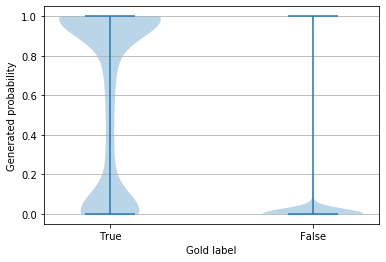

In [42]:
true_results = list(pd.to_numeric(sent_df.query("gold_label==True").loc[:,"fuzzy_result"], errors="coerce").dropna())
false_results = list(pd.to_numeric(sent_df.query("gold_label==False").loc[:,"fuzzy_result"], errors="coerce").dropna())

data = [true_results, false_results]
fig, ax = plt.subplots()
ax.violinplot(data)
ax.yaxis.grid(True)
ax.set_xticks([y + 1 for y in range(len(data))])
ax.set_xlabel("Gold label")
ax.set_ylabel("Generated probability")

plt.setp(ax, xticks=[y + 1 for y in range(len(data))], xticklabels=["True", "False"])

plt.savefig("./images/final_fuzzy_violin.png", format="png", bbox_inches="tight")
plt.show()